<a href="https://colab.research.google.com/github/powersurge8891/Data-Segmentation/blob/main/Wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#getting data and libraries

In [1]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/4. Clustering - Gaussian Mixture Model

/content/drive/MyDrive/Data Mining for Business in Python/4. Clustering - Gaussian Mixture Model


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [3]:
data=pd.read_csv('Wine-quality-challenge.csv')

#Exploring data

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


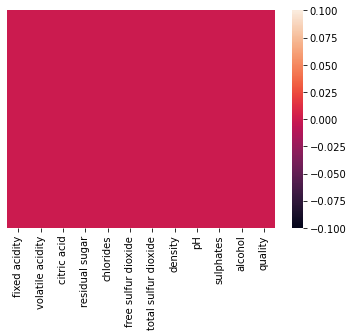

In [5]:
import seaborn as sns
sns.heatmap(data.isna(), yticklabels=False)

#Optimum cluster

In [6]:
components= np.arange(1,10)

In [7]:
test_model= [GaussianMixture(n, random_state=59).fit(data) for n in components]

Text(0.5, 0, 'Number of components')

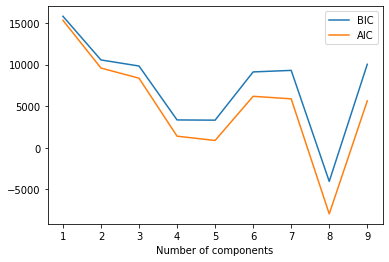

In [8]:
plt.plot(components, [m.bic(data) for m in test_model], label='BIC')
plt.plot(components, [m.aic(data) for m in test_model], label='AIC')
plt.legend()
plt.xlabel('Number of components')

In [9]:
#testing best cluster
model= GaussianMixture(4, random_state=48).fit(data)


In [16]:
old_data=data.drop(columns='clusters')
old_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:

data['clusters']=model.predict(data)

In [12]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters
1356,6.1,0.34,0.25,1.8,0.084,4.0,28.0,0.99464,3.36,0.44,10.1,5,1
577,8.8,0.44,0.49,2.8,0.083,18.0,111.0,0.99820,3.30,0.60,9.5,5,1
1489,6.2,0.57,0.10,2.1,0.048,4.0,11.0,0.99448,3.44,0.76,10.8,6,2
1206,7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,7,2
260,7.9,0.33,0.23,1.7,0.077,18.0,45.0,0.99625,3.29,0.65,9.3,5,1


In [17]:
clusters=pd.DataFrame(model.means_, 
                columns=list(old_data.columns)
                
                ).round(2)

In [18]:
clusters

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.05,0.61,0.28,2.09,0.16,12.43,51.45,1.0,3.26,0.79,9.81,5.19
1,8.17,0.58,0.23,2.24,0.08,16.33,54.11,1.0,3.31,0.59,9.89,5.00
2,8.54,0.46,0.29,2.18,0.08,14.91,33.09,1.0,3.31,0.69,10.81,6.26
3,8.27,0.54,0.31,4.68,0.08,19.69,61.69,1.0,3.34,0.67,11.14,5.81


In [24]:
data.loc[data['clusters']==0].sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters
81,7.8,0.430,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,5,0
1260,8.6,0.635,0.68,1.8,0.403,19.0,56.0,0.99632,3.02,1.15,9.3,5,0
600,8.2,0.915,0.27,2.1,0.088,7.0,23.0,0.99620,3.26,0.47,10.0,4,0


In [25]:
data.loc[data['clusters']==1].sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters
1421,7.5,0.40,0.18,1.6,0.079,24.0,58.0,0.9965,3.34,0.58,9.4,5,1
497,7.2,0.34,0.32,2.5,0.090,43.0,113.0,0.9966,3.32,0.79,11.1,5,1
618,11.4,0.46,0.50,2.7,0.122,4.0,17.0,1.0006,3.13,0.70,10.2,5,1
